In [6]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.5325 - val_loss: 0.4670
Epoch 2/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.4305 - val_loss: 0.4071
Epoch 3/5
60000/60000 [==============================] - 4s 59us/step - loss: 0.3954 - val_loss: 0.3874
Epoch 4/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.3781 - val_loss: 0.3724
Epoch 5/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.3643 - val_loss: 0.3601


In [7]:
prediction = autoencoder.predict(x_test[[2],:])

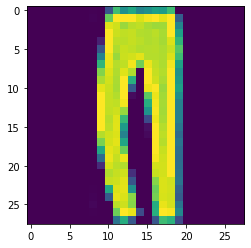

In [8]:
from matplotlib import pyplot as plt
plt.imshow(x_test[2].reshape(28,28))
plt.show()

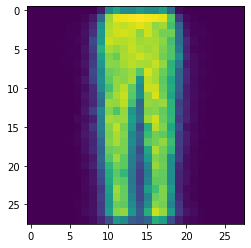

In [9]:
from matplotlib import pyplot as plt
plt.imshow(prediction.reshape(28,28))
plt.show()

In [10]:
encoding_dim = 32
input_img = Input(shape=(784,))
addedHiddenLayer1=Dense(512,activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(addedHiddenLayer1)
addedHiddenLayer2=Dense(512,activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(addedHiddenLayer2)
autoencoder_new = Model(input_img, decoded)
autoencoder_new.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder_new.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 219us/step - loss: 0.4766 - accuracy: 0.4657 - val_loss: 0.3926 - val_accuracy: 0.4867
Epoch 2/10
60000/60000 [==============================] - 13s 220us/step - loss: 0.3776 - accuracy: 0.4926 - val_loss: 0.3694 - val_accuracy: 0.4892
Epoch 3/10
60000/60000 [==============================] - 13s 217us/step - loss: 0.3580 - accuracy: 0.4969 - val_loss: 0.3482 - val_accuracy: 0.4956
Epoch 4/10
60000/60000 [==============================] - 14s 236us/step - loss: 0.3406 - accuracy: 0.5006 - val_loss: 0.3347 - val_accuracy: 0.5022
Epoch 5/10
60000/60000 [==============================] - 18s 292us/step - loss: 0.3298 - accuracy: 0.5022 - val_loss: 0.3255 - val_accuracy: 0.5000
Epoch 6/10
60000/60000 [==============================] - 15s 249us/step - loss: 0.3241 - accuracy: 0.5029 - val_loss: 0.3247 - val_accuracy: 0.5031
Epoch 7/10
60000/60000 [==============================] 

In [11]:
# prediction on the test data
prediction = autoencoder_new.predict(x_test[[2],:])

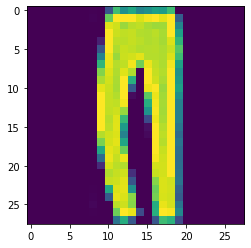

In [12]:
from matplotlib import pyplot as plt
plt.imshow(x_test[2].reshape(28,28))
plt.show()

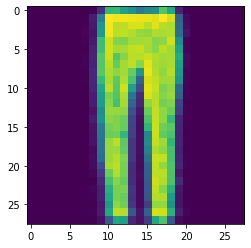

In [13]:
from matplotlib import pyplot as plt
plt.imshow(prediction.reshape(28,28))
plt.show()

In [14]:

#Adding Noises
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [15]:
history=autoencoder_new.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 235us/step - loss: 0.3208 - accuracy: 0.5035 - val_loss: 0.2999 - val_accuracy: 0.0000e+00
Epoch 2/10
60000/60000 [==============================] - 14s 234us/step - loss: 0.3172 - accuracy: 0.5040 - val_loss: 0.2984 - val_accuracy: 0.0000e+00
Epoch 3/10
60000/60000 [==============================] - 13s 214us/step - loss: 0.3159 - accuracy: 0.5042 - val_loss: 0.2959 - val_accuracy: 0.0000e+00
Epoch 4/10
60000/60000 [==============================] - 14s 232us/step - loss: 0.3145 - accuracy: 0.5044 - val_loss: 0.2966 - val_accuracy: 0.0000e+00
Epoch 5/10
60000/60000 [==============================] - 14s 240us/step - loss: 0.3134 - accuracy: 0.5046 - val_loss: 0.2931 - val_accuracy: 0.0000e+00
Epoch 6/10
60000/60000 [==============================] - 16s 261us/step - loss: 0.3124 - accuracy: 0.5047 - val_loss: 0.2915 - val_accuracy: 0.0000e+00
Epoch 7/10
60000/60000 [========

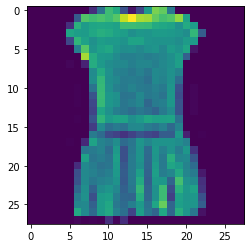

In [16]:

from matplotlib import pyplot as plt
plt.imshow(x_train[3].reshape(28,28))
plt.show()

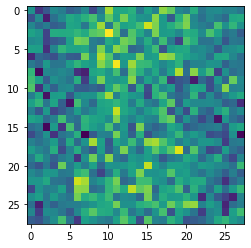

In [17]:
from matplotlib import pyplot as plt
plt.imshow(x_train_noisy[3].reshape(28,28))
plt.show()

In [18]:
prediction_new = autoencoder_new.predict(x_train_noisy[1:])

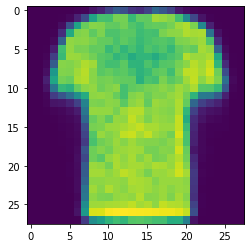

In [19]:
from matplotlib import pyplot as plt
plt.imshow(prediction_new[0].reshape(28,28))
plt.show()

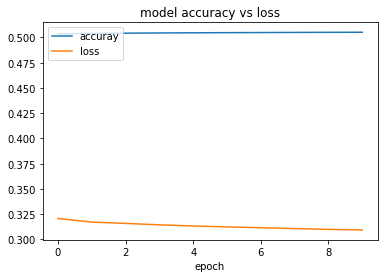

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy vs loss')
plt.xlabel('epoch')
plt.legend(['accuray','loss'], loc='upper left')
plt.show()

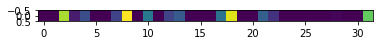

In [21]:

input_img = Input(shape=(784,))
encoded = Dense(32, activation='relu')(input_img)

encoder = Model(input_img, encoded)
 
encoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])
 
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
 
encoded_imgs = encoder.predict(x_test[[2],:])
 
from matplotlib import pyplot as plt
plt.imshow(encoded_imgs)
plt.show()